# Explore here

In [13]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")
data_uni = data.drop_duplicates()
data_uni.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [16]:
import regex as re

data_uni["is_spam"] = data_uni["is_spam"].astype(int)


def preprocess_url(url):
    # Convertir a minúsculas
    url = url.lower()
    
    # Eliminar el protocolo (http, https)
    url = re.sub(r'^https?://', '', url)
    
    # Eliminar 'www.'
    url = re.sub(r'^www\.', '', url)
    
    # Reemplazar caracteres especiales comunes con espacios
    url = re.sub(r'[^\w/.-]', ' ', url)
    
    # Reemplazar múltiples barras, puntos o guiones con uno solo
    url = re.sub(r'[/-]{2,}', '/', url)
    url = re.sub(r'\.{2,}', '.', url)
    
    # Tokenizar por /, ., y -
    tokens = re.split(r'[/.\\-]', url)
    
    # Filtrar tokens vacíos o muy cortos (opcional)
    tokens = [t for t in tokens if len(t) > 1]
    
    return tokens

data_uni["url"] = data_uni["url"].apply(preprocess_url)
data_uni.head()

/tmp/ipykernel_3491/3908324499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uni["is_spam"] = data_uni["is_spam"].astype(int)
/tmp/ipykernel_3491/3908324499.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uni["url"] = data_uni["url"].apply(preprocess_url)


,url,is_spam
0,"[briefingday, us8, list, manage, com, unsubscr...",1
1,"[hvper, com]",1
2,"[briefingday, com, v4n3i4f3]",1
3,"[briefingday, com, 20200618, m commentform]",0
4,"[briefingday, com, fan]",1


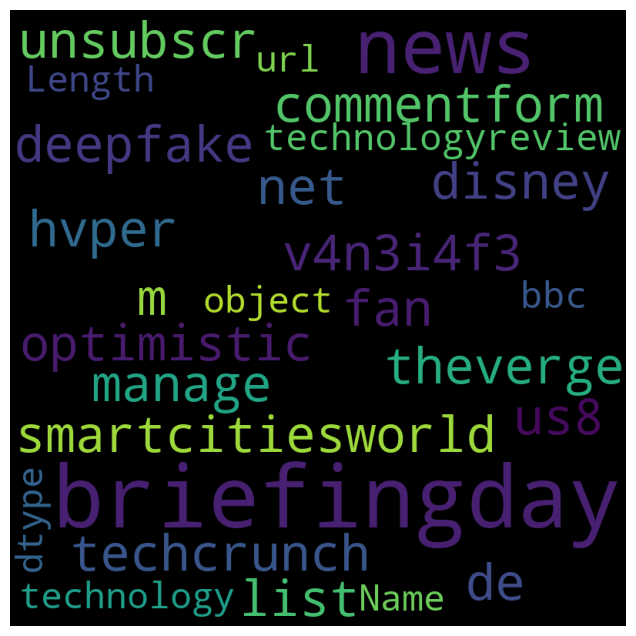

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42).generate(str(data_uni["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokens_list = data_uni["url"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = data_uni["is_spam"]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(f"Precisión del modelo: {score}")

Precisión del modelo: 0.9514767932489452
